In [1]:
import sklearn

import numpy as np
import matplotlib.pyplot as plt

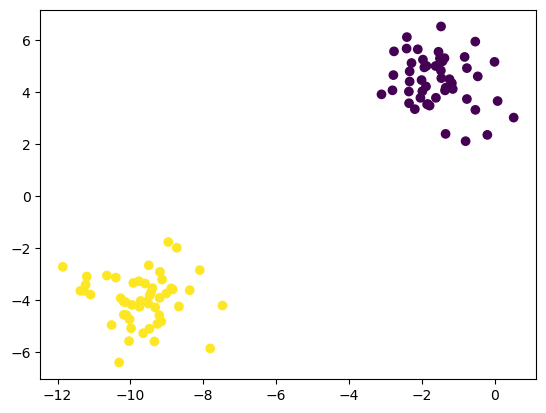

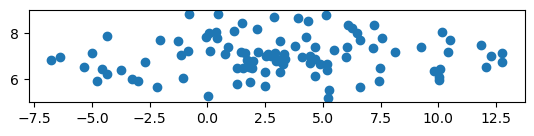

In [4]:
#create playground data to test
def makeBlob():
    from sklearn.datasets import make_blobs

    X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

    #plot the data
   
    import matplotlib.pyplot as plt
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()
    return X

X=makeBlob()
def makeEllipse():


    # Ellipse parameters
    h = 3.0  # X-coordinate of the center
    k = 7.0  # Y-coordinate of the center
    a = 10.0  # Semi-major axis
    b = 2.0  # Semi-minor axis

    # Number of points to generate
    num_points = 100

    # Generate random points within the ellipse
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = np.random.rand(num_points)  # Random radii between 0 and 1
    x = h + a * r * np.cos(theta)
    y = k + b * r * np.sin(theta)

    points=np.array([[x,y] for x,y in zip(x,y)])
    # Plot the points
    plt.scatter(x, y)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return points

X=makeEllipse()


In [5]:
#use PCA on this X vector
print(X.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
zeros=np.zeros(X_pca.shape[0])
#plot the data
plt.scatter(X_pca[:,0], zeros, c=y)


#PCA is ok

(100, 2)


NameError: name 'y' is not defined

(100, 2)


/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


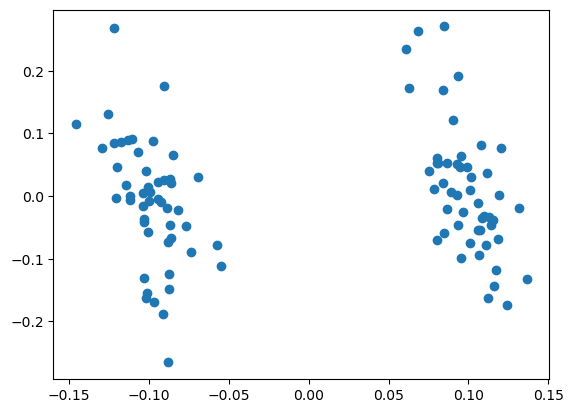

In [6]:
#use ICA on this X vector
print(X.shape)
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica.fit(X)
X_ica = ica.transform(X)
zeros=np.zeros(X_ica.shape[0])

#plot the data
plt.scatter(X_ica[:,0], X_ica[:,1])
plt.show()

In [7]:
#use randomized projection on this X vector

#we will use sklearn.random_projection

from sklearn import random_projection
rp = random_projection.GaussianRandomProjection(n_components=2)
rp.fit(X)
X_rp = rp.transform(X)
zeros=np.zeros(X_rp.shape)
#plot the data
plt.scatter(X_rp[:,0], X_rp[:,1], c=y)



NameError: name 'y' is not defined

A
A
[[0.13400858 0.00205537 0.86393605]]
B


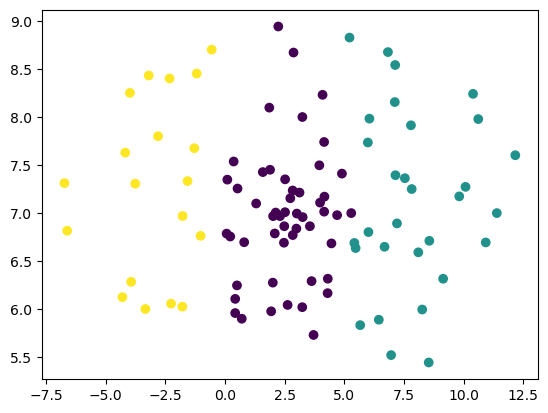

In [14]:
#expectation maximization with GMM and sklearn

from sklearn.mixture import GaussianMixture
print("A")
gm=GaussianMixture(n_components=3).fit(X)
print("A")
y_pred=gm.predict(X)

print(gm.predict_proba([[0,8.5]]))
print("B")
plt.scatter(X[:,0], X[:,1], c=y_pred)

/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


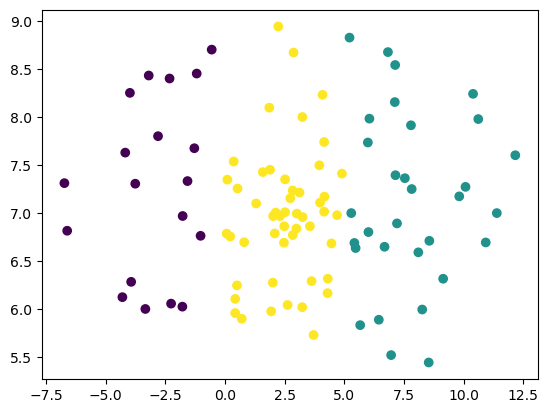

In [16]:
#apply k-means clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

y_pred=kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)


In [17]:
#code for S curve example from sklearn


# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

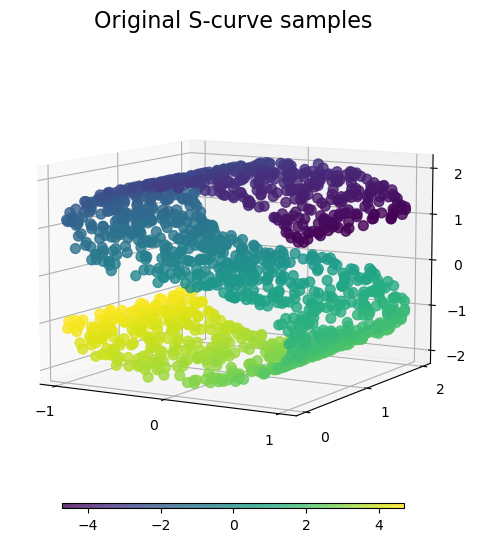

In [18]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

# CLUSTERING THE titanic DATASET

In [2]:



import pandas as pd
import numpy as np

data = pd.read_csv('tcc_ceds_music.csv')

Xall=data.drop(['Unnamed: 0','artist_name','track_name','lyrics','len','loudness','topic','age'],axis=1)


#show how many release dates are before 1990
print(len(Xall[Xall['release_date']<=1990]))

#show how many release dates are after1990
print(len(Xall[Xall['release_date']>1990]))

#if song is <=1990, make encodedDate = -1, else make encodedDate = 1
Xall['encodedDate']=np.where(Xall['release_date']<=1990,0,1)




#one hot encode the genre
Xall=pd.get_dummies(Xall,columns=['genre'])

print(Xall.keys())

y=Xall[['encodedDate','release_date']]

Xall=Xall.drop(['encodedDate','release_date'],axis=1)

print(Xall.head())


#divide into train and test with 85/15
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xall, y, test_size=0.15, random_state=42)

print(y_train.head())


13915
14457
Index(['release_date', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'encodedDate',
       'genre_blues', 'genre_country', 'genre_hip hop', 'genre_jazz',
       'genre_pop', 'genre_reggae', 'genre_rock'],
      dtype='object')
     dating  violence  world/life  night/time  shake the audience  \
0  0.000598  0.063746    0.000598    0.000598            0.000598   
1  0.035537  0.096777    0.443435    0.001284            0.001284   
2  0.002770  0.002770    0.002770    0.002770            0.002770   
3  0.048249  0.001548    0.001548    0.001548            0.021500   
4  0.001350  0.001350    0.417772    0.001350            0.001350   

   family/gospel  romantic  communication   obsce

In [34]:
#use k means to cluster Xall in 8 groups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(Xall)
y_pred=kmeans.predict(Xall)


for i in range(8):
    print(np.mean(y[y_pred==i]))
    #print the size of each cluster
    print(len(y_pred[y_pred==i]))

/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9878318584070797
904
0.5706951871657754
4675
0.4754561251086012
4604
0.4115702479338843
5445
0.6989591673338671
2498
0.5347050074367873
4034
0.505071521456437
3845
0.2623574144486692
2367


In [4]:

import pandas as pd
train_df = pd.read_csv("train.csv")

def preprocess(df):
    df = df.copy()
    
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])
    
    def ticket_number(x):
        return x.split(" ")[-1]
        
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])
    
    def maleness(x):
        if x == 'male':
            return 1
        return 0
    
    df["Name"] = df["Name"].apply(normalize_name)
    print(df.keys())
    df.drop(["PassengerId","Name","Ticket", "Cabin", "Embarked"], axis=1, inplace=True)


    #divide Fare by the max fare
    df['Fare']=df['Fare']/max(df['Fare'])
    #divide Age by the max age
    df['Age']=df['Age']/max(df['Age'])

    #if age is nan, make it the avergae age
    df['Age']=df['Age'].fillna(np.mean(df['Age']))

    df['Parch']=df['Parch']/max(df['Parch'])

    df['SibSp']=df['SibSp']/max(df['SibSp'])

    #one hot encode the Pclass
    df=pd.get_dummies(df,columns=['Pclass'])

    df["isMale"] = df["Sex"].apply(maleness)
    y=df['Survived']
    df.drop(["Sex","Survived"], axis=1, inplace=True)
    return df,y
    
preprocessed_train_df,y = preprocess(train_df)



print(preprocessed_train_df.keys())

preprocessed_train_df.head(5)
print(y.head(5))

#print min fare
print(min(preprocessed_train_df['Fare']))


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'isMale'],
      dtype='object')
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
0.0


In [7]:
#divide into 2 clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto').fit(preprocessed_train_df)
    #compute silhouette score
    score1=silhouette_score(preprocessed_train_df,kmeans.labels_)

    #compute Calinski-Harabasz score
    score2=sklearn.metrics.calinski_harabasz_score(preprocessed_train_df,kmeans.labels_)
    #compute dunn score
    score3=sklearn.metrics.davies_bouldin_score(preprocessed_train_df,kmeans.labels_)

    scores.append([score1,score2,score3])

#plot 3 curves for each score
scores=np.array(scores)
#normalize the scores
scores[:,0]=scores[:,0]/max(scores[:,0])
scores[:,1]=scores[:,1]/max(scores[:,1])
scores[:,2]=scores[:,2]/max(scores[:,2])
plt.plot(range(2,20),scores[:,0])
plt.plot(range(2,20),scores[:,1])
plt.plot(range(2,20),scores[:,2])
plt.title("k-means clustering scores for Titanic dataset")
#legend
plt.legend(['Silhouette','Calinski-Harabasz','daviess-bouldin'])
plt.show()

NameError: name 'preprocessed_train_df' is not defined

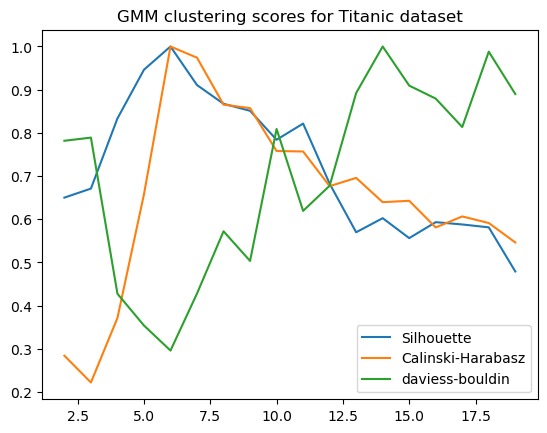

In [56]:
#divide into 2 clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores=[]
for k in range(2,20):
    #Use gmm with k clusters
    gmm = GaussianMixture(n_components=k).fit(preprocessed_train_df)
    
    #compute silhouette score
    cluster_labels = gmm.predict(preprocessed_train_df)
    score1=silhouette_score(preprocessed_train_df,cluster_labels)


    #compute Calinski-Harabasz score
    score2=sklearn.metrics.calinski_harabasz_score(preprocessed_train_df,cluster_labels)
    #compute dunn score
    score3=sklearn.metrics.davies_bouldin_score(preprocessed_train_df,cluster_labels)

    scores.append([score1,score2,score3])

#plot 3 curves for each score
scores=np.array(scores)
#normalize the scores
scores[:,0]=scores[:,0]/max(scores[:,0])
scores[:,1]=scores[:,1]/max(scores[:,1])
scores[:,2]=scores[:,2]/max(scores[:,2])
plt.plot(range(2,20),scores[:,0])
plt.plot(range(2,20),scores[:,1])
plt.plot(range(2,20),scores[:,2])
plt.title("GMM clustering scores for Titanic dataset")
#legend
plt.legend(['Silhouette','Calinski-Harabasz','daviess-bouldin'])
plt.show()

In [ ]:
#divide into 6 clusters


0.0


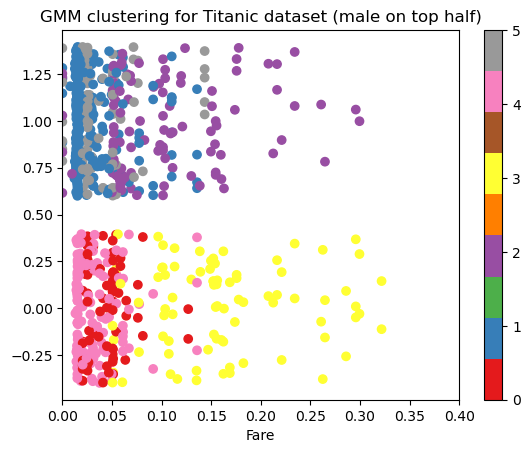

In [54]:
#project onto 2d with axes chosen on a pairplot
#import Gmm
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(preprocessed_train_df)
    

cluster_labels = gmm.predict(preprocessed_train_df)


#project all the points onto 2d with axes 'Age' and 'isMale' + a random noise between -0.1 and 0.1 uniform
#this is done to avoid overplotting

#add a random noise to the points
#copy the dataframe

copy=preprocessed_train_df.copy()
#print min of copy fare
print(min(copy['Fare']))
copy['isMale']=copy['isMale']+np.random.uniform(-0.4,0.4,len(copy['isMale']))

plt.scatter(copy['Fare'],copy['isMale'],c=cluster_labels,cmap='Set1')
plt.colorbar()
plt.xlim(0,0.4)
plt.xlabel('Fare')
plt.title("GMM clustering for Titanic dataset (male on top half)")
plt.show()


In [55]:
#get average rate of survival per cluster

for i in range(6):
    print(np.mean(y[cluster_labels==i]))
    #print the size of each cluster
    print(len(cluster_labels[cluster_labels==i]))

0.9210526315789473
76
0.13544668587896252
347
0.36885245901639346
122
0.9680851063829787
94
0.5
144
0.1574074074074074
108


0.0


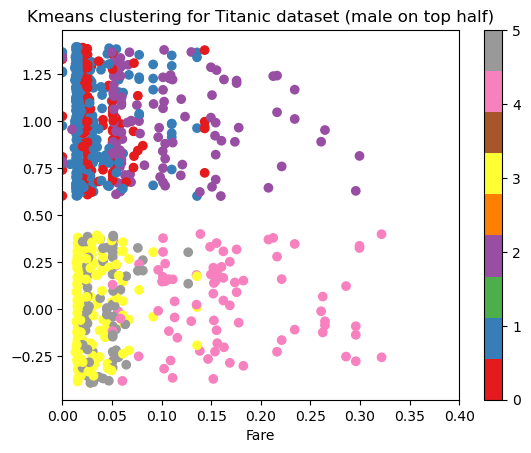

In [7]:
#project onto 2d with axes chosen on a pairplot
#impor tkmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0,n_init='auto').fit(preprocessed_train_df)

labels=kmeans.labels_


#project all the points onto 2d with axes 'Age' and 'isMale' + a random noise between -0.1 and 0.1 uniform
#this is done to avoid overplotting

#add a random noise to the points
#copy the dataframe

copy=preprocessed_train_df.copy()
#print min of copy fare
print(min(copy['Fare']))
copy['isMale']=copy['isMale']+np.random.uniform(-0.4,0.4,len(copy['isMale']))

plt.scatter(copy['Fare'],copy['isMale'],c=labels,cmap='Set1')
plt.colorbar()
plt.xlim(0,0.4)
plt.xlabel('Fare')
plt.title("Kmeans clustering for Titanic dataset (male on top half)")
plt.show()




In [6]:
#print the 6 centroids
toTransform=kmeans.cluster_centers_


NameError: name 'kmeans' is not defined

# Clustering the music ds (Xall)

In [41]:
#divide into 2 clusters
print(X_train.shape)
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,9):
    print(k)
    kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=k, random_state=0,n_init='auto',batch_size=2048).fit(X_train)
    #compute silhouette score



    score1=silhouette_score(X_train,kmeans.labels_)

    #compute Calinski-Harabasz score
    score2=sklearn.metrics.calinski_harabasz_score(X_train,kmeans.labels_)
    #compute dunn score
    score3=sklearn.metrics.davies_bouldin_score(X_train,kmeans.labels_)

    scores.append([score1,score2,score3])

#plot 3 curves for each score
scores=np.array(scores)
#normalize the scores
scores[:,0]=scores[:,0]/max(scores[:,0])
scores[:,1]=scores[:,1]/max(scores[:,1])
scores[:,2]=scores[:,2]/max(scores[:,2])


(24116, 28)
2
3
4
5
6
7
8


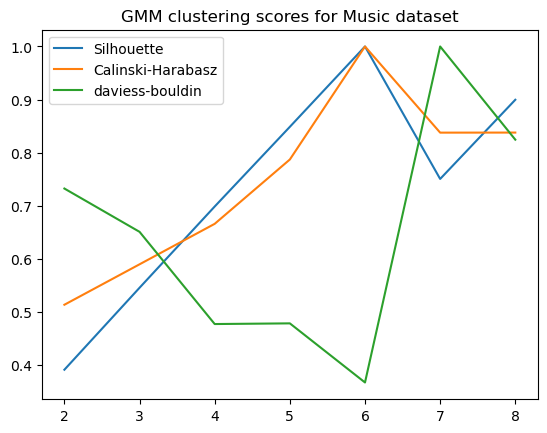

In [58]:
plt.plot(range(2,9),scores[:,0])
plt.plot(range(2,9),scores[:,1])
plt.plot(range(2,9),scores[:,2])
plt.title("GMM clustering scores for Music dataset")
#legend
plt.legend(['Silhouette','Calinski-Harabasz','daviess-bouldin'])
plt.show()

In [57]:
#divide into 2 clusters
print(X_train.shape)
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,9):
    print(k)
    #compute gmm
    gmm = GaussianMixture(n_components=k).fit(X_train)
    labels=gmm.predict(X_train)
    #compute silhouette score



    score1=silhouette_score(X_train,labels)

    #compute Calinski-Harabasz score
    score2=sklearn.metrics.calinski_harabasz_score(X_train,labels)
    #compute dunn score
    score3=sklearn.metrics.davies_bouldin_score(X_train,labels)

    scores.append([score1,score2,score3])

#plot 3 curves for each score
scores=np.array(scores)
#normalize the scores
scores[:,0]=scores[:,0]/max(scores[:,0])
scores[:,1]=scores[:,1]/max(scores[:,1])
scores[:,2]=scores[:,2]/max(scores[:,2])


(24116, 28)
2
3
4
5
6
7
8


In [115]:
#perform kmeans with 6 clusters
print(X_train.shape)
import sklearn
from sklearn.cluster import KMeans,MiniBatchKMeans
import time

#average on 10 runs
start=time.time()

kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=6, random_state=i,n_init='auto',batch_size=2048).fit(X_train)




(24116, 28)


In [4]:
#plot 2d projection of the data with axes chosen on a pairplot
subset=X_train.iloc[:,[18,17,27,23,24]]
subset['cluster']=kmeans.labels_
subset['date']=y_train['release_date']


import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(subset,hue='cluster',palette='Set1',plot_kws={'alpha':0.5,'s':17})
#plt.show()


#get the coordiantes of the centroids in var toTranformMusic
toTransformMusic=kmeans.cluster_centers_

NameError: name 'X_train' is not defined

In [63]:
#for each cluster, print the mean of the date
print(X_train.keys())

#figure out the genres % by cluster

for genre in ['genre_blues','genre_country','genre_hip hop','genre_jazz','genre_pop','genre_reggae','genre_rock']:
    for i in range(6):
        print("For cluster "+str(i)+" the % of "+genre+" is "+str(np.mean(X_train[genre][kmeans.labels_==i])))

Index(['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'acousticness',
       'instrumentalness', 'valence', 'energy', 'genre_blues', 'genre_country',
       'genre_hip hop', 'genre_jazz', 'genre_pop', 'genre_reggae',
       'genre_rock'],
      dtype='object')
For cluster 0 the % of genre_blues is 0.0
For cluster 1 the % of genre_blues is 0.0
For cluster 2 the % of genre_blues is 0.0
For cluster 3 the % of genre_blues is 0.0
For cluster 4 the % of genre_blues is 1.0
For cluster 5 the % of genre_blues is 0.0
For cluster 0 the % of genre_country is 0.0
For cluster 1 the % of genre_country is 0.0
For cluster 2 the % of genre_country is 0.0
For cluster 3 the % of genre_country is 1.0
For cluster 4 the % of genre_country is 0.0
For cluster 5 the % of genre_countr

In [27]:
#now force it to make only 3 clusters
kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=3, random_state=0,n_init='auto',batch_size=2048).fit(X_train)



for i in range(3):
    for genre in ['genre_blues','genre_country','genre_hip hop','genre_jazz','genre_pop','genre_reggae','genre_rock']:
    
        print("For cluster "+str(i)+" the % of "+genre+" is "+str(np.mean(X_train[genre][kmeans.labels_==i])))

For cluster 0 the % of genre_blues is 0.0
For cluster 0 the % of genre_country is 0.0
For cluster 0 the % of genre_hip hop is 0.0
For cluster 0 the % of genre_jazz is 0.0
For cluster 0 the % of genre_pop is 0.0
For cluster 0 the % of genre_reggae is 0.0
For cluster 0 the % of genre_rock is 1.0
For cluster 1 the % of genre_blues is 0.2902222222222222
For cluster 1 the % of genre_country is 0.0
For cluster 1 the % of genre_hip hop is 0.05644444444444444
For cluster 1 the % of genre_jazz is 0.05274074074074074
For cluster 1 the % of genre_pop is 0.44451851851851854
For cluster 1 the % of genre_reggae is 0.1560740740740741
For cluster 1 the % of genre_rock is 0.0
For cluster 2 the % of genre_blues is 0.0
For cluster 2 the % of genre_country is 0.6374685666387259
For cluster 2 the % of genre_hip hop is 0.0
For cluster 2 the % of genre_jazz is 0.3625314333612741
For cluster 2 the % of genre_pop is 0.0
For cluster 2 the % of genre_reggae is 0.0
For cluster 2 the % of genre_rock is 0.0


In [48]:
#print average fare for pclass1
# Calculate and print the average fare for each Pclass
print(preprocessed_train_df[preprocessed_train_df['Pclass_1'] == 1]['Fare'].mean())
print(preprocessed_train_df[preprocessed_train_df['Pclass_2'] == 1]['Fare'].mean())
print(preprocessed_train_df[preprocessed_train_df['Pclass_3'] == 1]['Fare'].mean())


0.16425901061270765
0.04032989560652391
0.026692896094606736


# dimensionality reducing - titanic

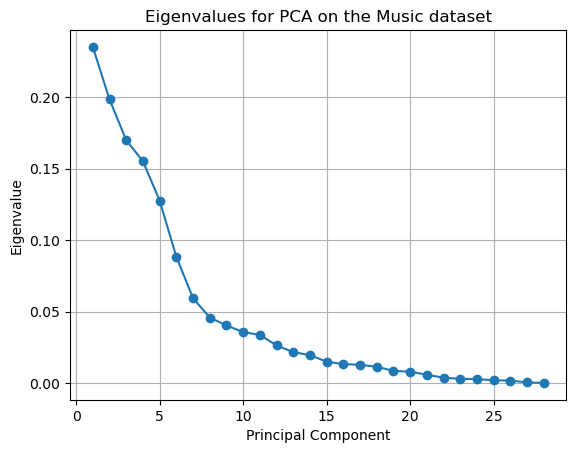

/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


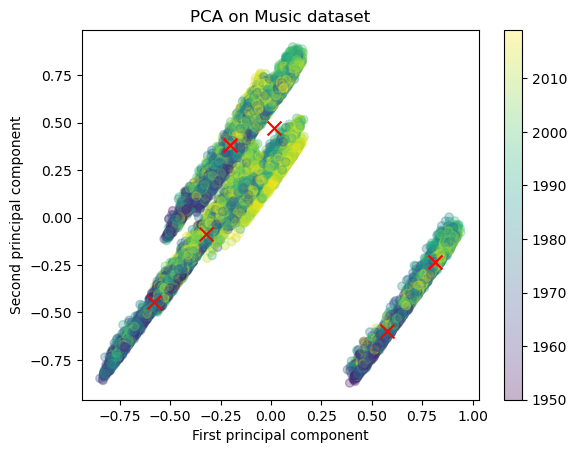

In [123]:
#the data is preprocessed_train_df



from sklearn.decomposition import PCA

#get the distrib of eigenvalues for PCA
# pca = PCA()
# pca.fit(preprocessed_train_df)
# plt.plot(pca.explained_variance_ratio_)
# plt.title("PCA eigenvalues for Titanic dataset")
# plt.show()



covariance_matrix = np.cov(X_train, rowvar=False)

# 4. Find the eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# 5. Plot the eigenvalues to identify the "elbow" point
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.title('Eigenvalues for PCA on the Music dataset')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()



#plot the data in 2d with the 2 first principal components
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

toTransformMusicc=pca.transform(toTransformMusic)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train['release_date'],alpha=0.3)
plt.colorbar()
plt.scatter(toTransformMusicc[:,0], toTransformMusicc[:,1], c='red',s=100,marker='x')
#legend the axis
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA on Music dataset")
#add colorbar from 1950 to 2019
plt.show()


(891, 8)
(6, 8)


/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


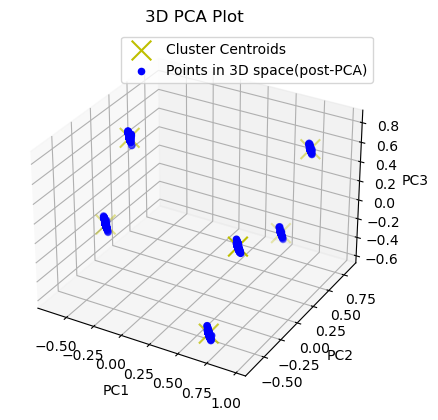

In [106]:
#peform PCA with 3 components
print(preprocessed_train_df.shape)
print(toTransform.shape)
pca = PCA(n_components=3)

pca.fit(preprocessed_train_df)
X_pca = pca.transform(preprocessed_train_df)

transformed=pca.transform(toTransform)

#plot the data in 3d
# ... (Previous code for PCA)

# Plot the data in 3D
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data in 3D
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c='y', s=200, marker='x', label='Cluster Centroids')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', marker='o', label='Points in 3D space(post-PCA)')

# Set labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a legend to distinguish yellow and blue points
ax.legend()

plt.title('3D PCA Plot')
plt.show()


/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be

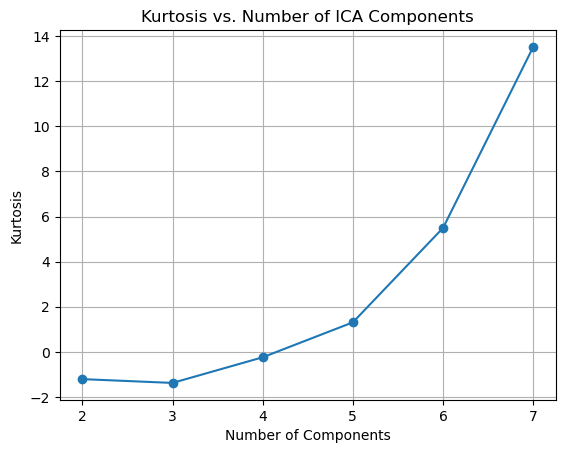

In [5]:
n_components_range = range(2, 8)
#data_df=preprocessed_train_df
data_df=preprocessed_train_df
from scipy.stats import kurtosis

#import fastICA
from sklearn.decomposition import FastICA
#FOR titanic

# Initialize an empty list to store kurtosis values
kurtosis_values = []

# Perform ICA for different numbers of components
for n_components in n_components_range:
    ica = FastICA(n_components=n_components)
    ica.fit(data_df)
    transformed_data = ica.transform(data_df)
    
    # Calculate the kurtosis for the transformed data
    kurtosis_value = kurtosis(transformed_data, axis=0)
    kurtosis_values.append(np.mean(kurtosis_value))

# Plot kurtosis vs. the number of components
plt.figure()
plt.plot(n_components_range, kurtosis_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.title('Kurtosis vs. Number of ICA Components')
plt.grid()
plt.show()

(891, 8)


Text(0.5, 1.0, 'Random projection error for Titanic dataset')

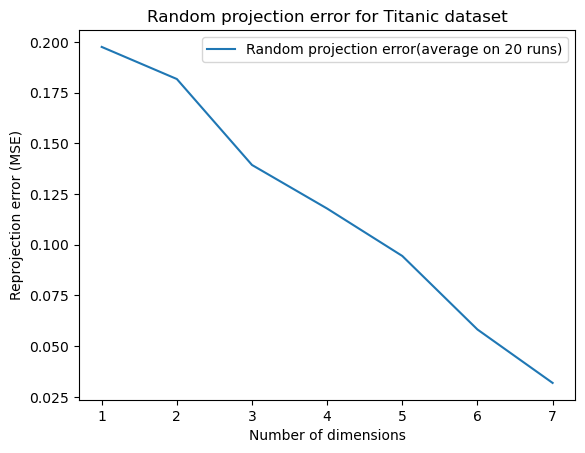

In [145]:
#let's take a random projection of the data from titanic
import numpy as np





original_data = preprocessed_train_df.values
print(original_data.shape)

# Number of dimensions to project to (1, 2, 3, 4, 5, 6, 7)
dimensions_to_project = [i for i in range(1,8)]

def random_projection_reprojection_error(input_df, dimensions_to_project, num_runs=20):
    # Number of dimensions in the input DataFrame
    num_dims = input_df.shape[1]
    
    # Initialize variables to store squared errors
    squared_errors = []

    for _ in range(num_runs):
        run_errors = []
        for n_dims in dimensions_to_project:
            # Randomly project to n_dims dimensions
            projection_matrix = np.random.randn(num_dims, n_dims)
            projected_data = input_df.dot(projection_matrix)

            # Compute the pseudoinverse of the projection matrix and reproject
            pseudoinverse_matrix = np.linalg.pinv(projection_matrix)
            reprojected_data = projected_data.dot(pseudoinverse_matrix)

            # Compute the squared error
            squared_error = np.mean(np.square(input_df - reprojected_data))
            run_errors.append(squared_error)
        squared_errors.append(run_errors)

    # Calculate the mean squared errors over the runs for each number of dimensions
    mean_squared_errors = np.mean(np.array(squared_errors), axis=0)
    
    return mean_squared_errors

# Create a sample DataFrame (replace this with your own data)







tograph=(random_projection_reprojection_error(original_data, dimensions_to_project))

plt.plot(dimensions_to_project,tograph)
plt.legend(['Random projection error(average on 20 runs)'])
plt.xlabel('Number of dimensions')
plt.ylabel('Reprojection error (MSE)')
plt.title("Random projection error for Titanic dataset")


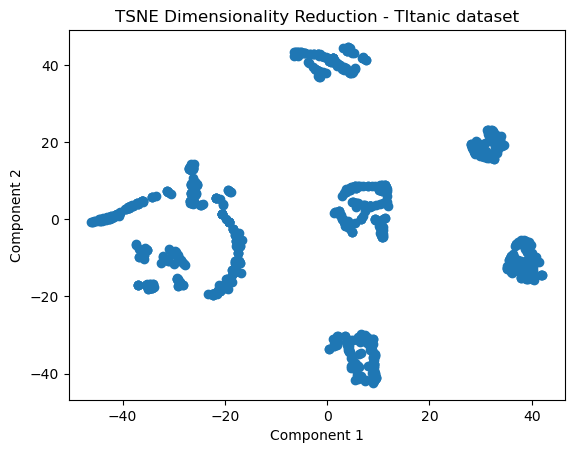

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding





from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
reduced_data = tsne.fit_transform(preprocessed_train_df)

# Visualize the reduced data (scatter plot)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=, cmap='Set1')

#scatter data2 in red with big cross

plt.title("TSNE Dimensionality Reduction - TItanic dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [39]:
#run 3 dim PCA on titanic, then GMM clustering and print a 3d plot
#Import PCA
#import gmm
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
#3 dim PCA on titanic
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

print(X_pca.shape)

print(y_train['encodedDate'].shape)

gmm = GaussianMixture(n_components=6).fit(X_pca)
cluster_labels = gmm.predict(X_pca)


(24116, 3)
(24116,)


In [53]:
#run kNN on music
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train['encodedDate'])
y_pred=neigh.predict(X_test)

#compute accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test['encodedDate'], y_pred))


0.7185150375939849


/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Extended Loss Curve for Model 1:
[0.697022630315123, 0.6914244271353869, 0.688520760717754, 0.6812302622067449, 0.6673322422264759, 0.6482230534040982, 0.62922135458031, 0.6136872701238181, 0.6019144430482238, 0.5931424502624483, 0.586252665211653, 0.5808646220306808, 0.5761992113722811, 0.5722952061946357, 0.5687820800639717, 0.566172011605654, 0.5639912104406011, 0.5618368752404869, 0.5602066220091191, 0.5591399001608461, 0.5579695330709149, 0.5568099338040543, 0.5561905271284164, 0.5555164684682984, 0.5547228546331668, 0.554164307558038, 0.5537389410024947, 0.5532454203989509, 0.5528473800495227, 0.5527390747727563, 0.5523456341682306, 0.5521308872816951, 0.5517673568870842, 0.5516647551156348, 0.5513377230327227, 0.5511940385765608, 0.5510341530707579, 0.5508341693773471, 0.5508195249829134, 0.5505811806165639, 0.5503661300630086, 0.5502938890150963, 0.5502080993080569, 0.5501262089284797, 0.5500511664722424, 0.5498065334820965, 0.5495157699912123, 0.5498149531386723, 0.54955668527

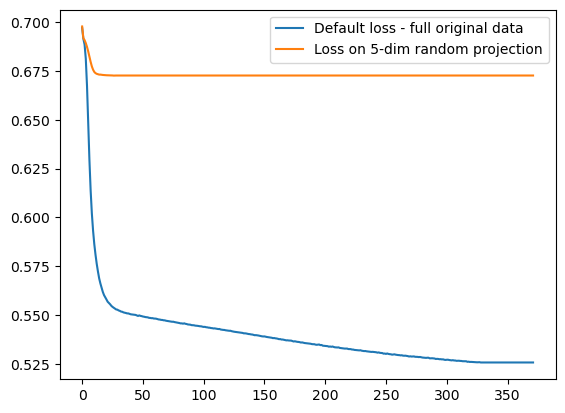

In [94]:
#create a neural network to predict based 

from sklearn import random_projection
rp = random_projection.GaussianRandomProjection(n_components=2)
rp.fit(X_train)
X_train_random = rp.transform(X_train)
X_test_random = rp.transform(X_test)



from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#mlp = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)

#fit the model with X_train
#mlp.fit(X_train, y_train['encodedDate'])

#display learning


mlp2 = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp2.fit(X_train_random, y_train['encodedDate'])

loss_curve1=mlp.loss_curve_
loss_curve2=mlp2.loss_curve_
if len(loss_curve1) < len(loss_curve2):
    loss_curve1.extend([loss_curve1[-1]] * (len(loss_curve2) - len(loss_curve1)))
elif len(loss_curve2) < len(loss_curve1):
        loss_curve2.extend([loss_curve2[-1]] * (len(loss_curve1) - len(loss_curve2)))

# Print the extended loss curves
print("Extended Loss Curve for Model 1:")
print(loss_curve1)
print("Extended Loss Curve for Model 2:")
print(loss_curve2)

# Plot the extended loss curves
plt.plot(loss_curve1, label='Default loss - full original data')
plt.plot(loss_curve2, label='Loss on 5-dim random projection')
plt.legend()
plt.show()

In [95]:
#get mlp1 accuracy on test set and mlp2 accuracy on test set
y_pred1=mlp.predict(X_test)

X_pca_test = pca.transform(X_test)
y_pred2=mlp2.predict(X_test_random)

print(accuracy_score(y_test['encodedDate'], y_pred1))
print(accuracy_score(y_test['encodedDate'], y_pred2))

0.7422462406015038
0.5679041353383458


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

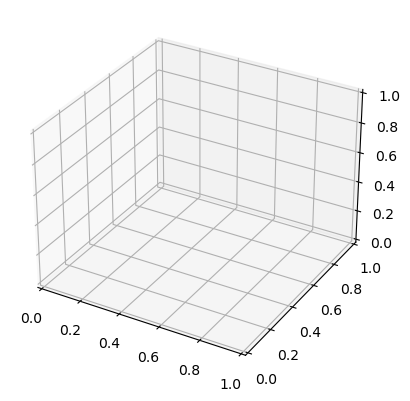

In [35]:

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X_pca['label']=y_train['release_date']
# Scatter plot points with different colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Update with more colors if needed
legends=[
    "Cluster 1: blues/jazz",
    "Cluster 2: pop",
    "Cluster 3: country",
    "Cluster 4: blues/jazz",
    "Cluster 5: rock/reggae/hip hop",
    "Cluster 6: pop"]
for i in range(6):

    ax.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], X_pca[cluster_labels == i, 2], c='r', label=legends[i])

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA and GMM Clustering (6 clusters)')



plt.legend()
plt.show()


#print the genres % by cluster

for genre in ['genre_blues','genre_country','genre_hip hop','genre_jazz','genre_pop','genre_reggae','genre_rock']:
    for i in range(6):
        print("For cluster "+str(i)+" the % of "+genre+" is "+str(np.mean(X_train[genre][cluster_labels==i])))

In [ ]:
#run 2d GMM clustering with 6 clusters on a dataframe named hello



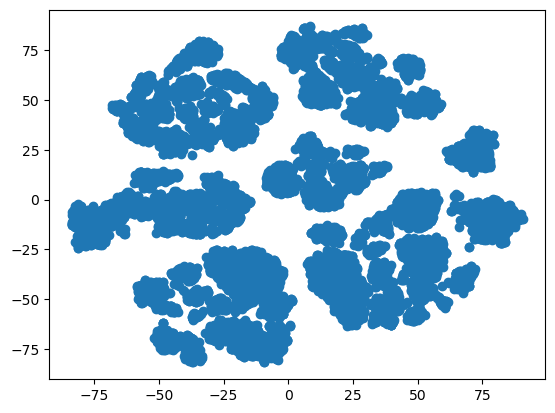

In [98]:
#read aaa.csv as a set of 2d points
hello=pd.read_csv('aaa.csv')


#plot it
plt.scatter(hello['0'],hello['1'])
plt.show()

In [105]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#mlp = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)

#fit the model with X_train
#mlp.fit(X_train, y_train['encodedDate'])

#display learning


X_post_manifold=hello[['0','1']].values
print("DSF")
print(X_post_manifold.shape)

mlp2 = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp2.fit(fsad, y_train['encodedDate'])

loss_curve1=mlp.loss_curve_
loss_curve2=mlp2.loss_curve_
if len(loss_curve1) < len(loss_curve2):
    loss_curve1.extend([loss_curve1[-1]] * (len(loss_curve2) - len(loss_curve1)))
elif len(loss_curve2) < len(loss_curve1):
        loss_curve2.extend([loss_curve2[-1]] * (len(loss_curve1) - len(loss_curve2)))

# Print the extended loss curves
print("Extended Loss Curve for Model 1:")
print(loss_curve1)
print("Extended Loss Curve for Model 2:")
print(loss_curve2)

# Plot the extended loss curves
plt.plot(loss_curve1, label='Default loss - full original data')
plt.plot(loss_curve2, label='Loss on 5-dim random projection')
plt.legend()
plt.show()

DSF
(14186, 2)


NameError: name 'fsad' is not defined

/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Extended Loss Curve for Model 1:
[0.697022630315123, 0.6914244271353869, 0.688520760717754, 0.6812302622067449, 0.6673322422264759, 0.6482230534040982, 0.62922135458031, 0.6136872701238181, 0.6019144430482238, 0.5931424502624483, 0.586252665211653, 0.5808646220306808, 0.5761992113722811, 0.5722952061946357, 0.5687820800639717, 0.566172011605654, 0.5639912104406011, 0.5618368752404869, 0.5602066220091191, 0.5591399001608461, 0.5579695330709149, 0.5568099338040543, 0.5561905271284164, 0.5555164684682984, 0.5547228546331668, 0.554164307558038, 0.5537389410024947, 0.5532454203989509, 0.5528473800495227, 0.5527390747727563, 0.5523456341682306, 0.5521308872816951, 0.5517673568870842, 0.5516647551156348, 0.5513377230327227, 0.5511940385765608, 0.5510341530707579, 0.5508341693773471, 0.5508195249829134, 0.5505811806165639, 0.5503661300630086, 0.5502938890150963, 0.5502080993080569, 0.5501262089284797, 0.5500511664722424, 0.5498065334820965, 0.5495157699912123, 0.5498149531386723, 0.54955668527

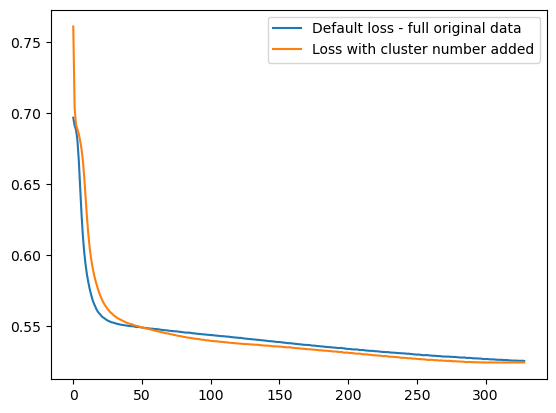

In [107]:
#add cluster numbers to X_train


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores=[]

gmm = GaussianMixture(n_components=k).fit(X_train)
labels=gmm.predict(X_train)

#add cluster numbers to X_train
betterX_train=X_train.copy()
betterX_train['cluster']=labels

#fit NN on X_train and on betterX_train to compare


from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#mlp = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)

#fit the model with X_train
#mlp.fit(X_train, y_train['encodedDate'])

#display learning

mlp= MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp.fit(X_train, y_train['encodedDate'])

mlp2 = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp2.fit(betterX_train, y_train['encodedDate'])

loss_curve1=mlp.loss_curve_
loss_curve2=mlp2.loss_curve_
if len(loss_curve1) < len(loss_curve2):
    loss_curve1.extend([loss_curve1[-1]] * (len(loss_curve2) - len(loss_curve1)))
elif len(loss_curve2) < len(loss_curve1):
        loss_curve2.extend([loss_curve2[-1]] * (len(loss_curve1) - len(loss_curve2)))

# Print the extended loss curves
print("Extended Loss Curve for Model 1:")
print(loss_curve1)
print("Extended Loss Curve for Model 2:")
print(loss_curve2)

# Plot the extended loss curves
plt.plot(loss_curve1, label='Default loss - full original data')
plt.plot(loss_curve2, label='Loss with cluster number added')
plt.legend()
plt.show()

/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Extended Loss Curve for Model 1:
[0.697022630315123, 0.6914244271353869, 0.688520760717754, 0.6812302622067449, 0.6673322422264759, 0.6482230534040982, 0.62922135458031, 0.6136872701238181, 0.6019144430482238, 0.5931424502624483, 0.586252665211653, 0.5808646220306808, 0.5761992113722811, 0.5722952061946357, 0.5687820800639717, 0.566172011605654, 0.5639912104406011, 0.5618368752404869, 0.5602066220091191, 0.5591399001608461, 0.5579695330709149, 0.5568099338040543, 0.5561905271284164, 0.5555164684682984, 0.5547228546331668, 0.554164307558038, 0.5537389410024947, 0.5532454203989509, 0.5528473800495227, 0.5527390747727563, 0.5523456341682306, 0.5521308872816951, 0.5517673568870842, 0.5516647551156348, 0.5513377230327227, 0.5511940385765608, 0.5510341530707579, 0.5508341693773471, 0.5508195249829134, 0.5505811806165639, 0.5503661300630086, 0.5502938890150963, 0.5502080993080569, 0.5501262089284797, 0.5500511664722424, 0.5498065334820965, 0.5495157699912123, 0.5498149531386723, 0.54955668527

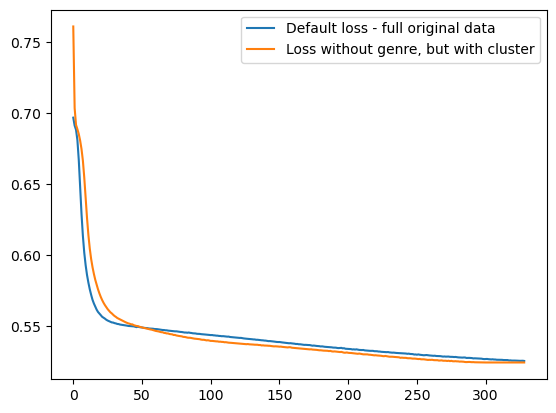

In [109]:
#take the X_train, remove all genres, and add the cluster number
X_train_no_genre=X_train.copy()
X_train_no_genre=X_train_no_genre.drop(['genre_blues','genre_country','genre_hip hop','genre_jazz','genre_pop','genre_reggae','genre_rock'],axis=1)

X_train_no_genre['cluster']=labels

#fit NN on X_train and on X_train_no_genre to compare


from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#mlp = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)

#fit the model with X_train
#mlp.fit(X_train, y_train['encodedDate'])

#display learning

mlp= MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp.fit(X_train, y_train['encodedDate'])

mlp2 = MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp2.fit(betterX_train, y_train['encodedDate'])

loss_curve1=mlp.loss_curve_
loss_curve2=mlp2.loss_curve_
if len(loss_curve1) < len(loss_curve2):
    loss_curve1.extend([loss_curve1[-1]] * (len(loss_curve2) - len(loss_curve1)))
elif len(loss_curve2) < len(loss_curve1):
        loss_curve2.extend([loss_curve2[-1]] * (len(loss_curve1) - len(loss_curve2)))

# Print the extended loss curves
print("Extended Loss Curve for Model 1:")
print(loss_curve1)
print("Extended Loss Curve for Model 2:")
print(loss_curve2)

# Plot the extended loss curves
plt.plot(loss_curve1, label='Default loss - full original data')
plt.plot(loss_curve2, label='Loss without genre, but with cluster')
plt.legend()
plt.show()


In [77]:
#cluster X_train with GMM in 6 clusters

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(X_train)
cluster_labels = gmm.predict(X_train)

cluster_test=gmm.predict(X_test)
#cluster_labels=cluster_labels.reshape((cluster_labels.shape[0],1))


#make shapeof cluster_labels (24116,1)
cluster_labels=cluster_labels.reshape((cluster_labels.shape[0],1))

print(cluster_labels.shape)



(24116, 1)


In [78]:
#fit a MLP with just the cluster_labels
#import MLP
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlp.fit(cluster_labels, y_train['encodedDate'])



/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 5), max_iter=400,
              random_state=42, warm_start=1)

In [79]:


#reshape cluster_test to 2d
cluster_test=cluster_test.reshape((cluster_test.shape[0],1))

#get the accuracy on the test set
y_pred=mlp.predict(cluster_test)
print(accuracy_score(y_test['encodedDate'], y_pred))


0.5408834586466166


In [80]:
#fit a network with just the hot-encoded of the cluster
#one hot encode the cluster
import pandas as pd
cluster_test=gmm.predict(X_test)
cluster_labels=gmm.predict(X_train)
cluster_labelss=pd.DataFrame(cluster_labels)
cluster_labelss=pd.get_dummies(cluster_labels,columns=[0])
print(cluster_labelss.shape)



#do the same for the test set
cluster_test=pd.DataFrame(cluster_test)
cluster_test=pd.get_dummies(cluster_test,columns=[0])
print(cluster_test.shape)

(24116, 6)
(4256, 6)


In [81]:
#fit a MLP with just the cluster_labels

mlpOneHot= MLPClassifier(hidden_layer_sizes=(8, 5), activation=('logistic'), solver='adam', max_iter=400, random_state=42,early_stopping=False,warm_start=1)
mlpOneHot.fit(cluster_labelss, y_train['encodedDate'])


#test accuracy
y_pred=mlpOneHot.predict(cluster_test)
print(accuracy_score(y_test['encodedDate'], y_pred))


/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


0.5580357142857143


/Users/brieucpopper/miniconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


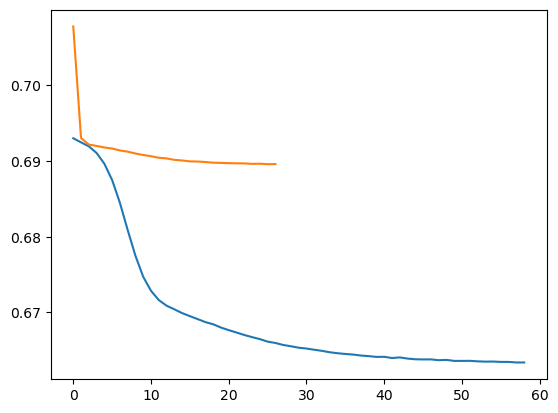

In [82]:
#print learning curve fo rmlpOneHot
loss_curve=mlpOneHot.loss_curve_
plt.plot(loss_curve)

#same for mlp
loss_curve=mlp.loss_curve_
plt.plot(loss_curve)

In [ ]:
#fit a bayes classifier to the onehot encoded cluster

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(cluster_labelss, y_train['encodedDate'])

#test accuracy
y_pred=gnb.predict(cluster_test)
print(accuracy_score(y_test['encodedDate'], y_pred))